# 네트워크 이론 개요
네트워크: 각각의 객체들이 상호 연결된 구조

구성요소: node와 링크

노드: 고유한 속성을 가지고 있는 행위자

링크: 노드들간의 관계

# 네트워크 이론의 기초
네트워크를 표현하는 네트워크 모델링 과정에서 중요한 것은 그래프,행렬

네트워크 그래프에서 노드와 노드 간 관계의 유무만이 아니라 관계의 정도 표시


# 네트워크 이론의 역사
프리만의 '중심성지표' 개발

연결정도 중심성, 근접 중심성, 매개 중심성 


버트의 '구조적 공백'

구조적 공백의 위치에 있는 노드는 다른 노드들과 중복적인 관계를 가지고 있지 않기 때문에 노드와 노드를 연결시켜 주는 역할을 함

왓츠, 스트로가츠의 '좁은 세상 네트워크'

무작위로 연결되어 있는 무작위 네트 워크(Random network)의 중간에 존재하는 좁은 세상 네트워크(small world network)

노드들간에 지름길이 존재, 이것을 통해 전체 네트워크가 긴밀하게 연결



    

# 네트워크 유형
네트워크는 링크의 방향성 유무와 가중치 유무에 따라 크게 4가지 유형으로 구분 가능
관계 위상 형태에 따라 링형,star형, line형, tree형, bus형 등으로 구분할 수 있다.

<분석 대상에 따른 분류>

전체 네트워크: 네트워크를 구성하고 있는 모든 노드를 포함한 네트워크
하위 네트워크: 전체 네트워크의 일부분으로 부속되어 있는 것으로 컴포넌트, 파당, 클러스터 등 해당

에고 네트워크: 네트워크 상에서 분석하고자 하는 특정 노드를 중심에 두고, 그 노드와 직접적으로 연결된 노드들 간의 관계를 네트워크로 표현



# 그래프 표현방법
인접행렬
인접한 노드들간의 연결 관계를 행렬로 표현, 네트워크 상에서 노드의 개수가 n인 경우 인접 행렬은 n*n의 정방 행렬로 표현

행과 열의 이름은 노드를 나타냄, 행과 열이 교차하는 지점의 행렬 값은 관계(링크)의 유무를 1과 0으로 나타냄.

In [6]:
import matplotlib.pyplot as plt

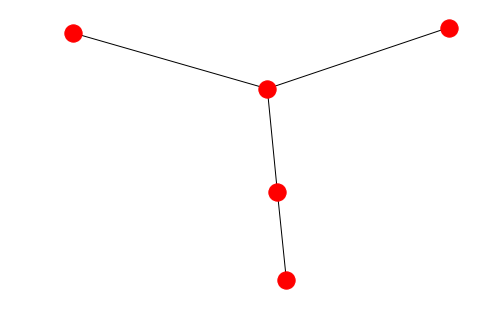

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

graph = nx.Graph()
graph.add_nodes_from((1,2,3,4,5)) # 노드 추가
graph.add_edges_from([(1,2), (1,3),(1,4),(3,5)])# 엣지 추가

nx.draw(graph) #그래프 그리기
plt.show()

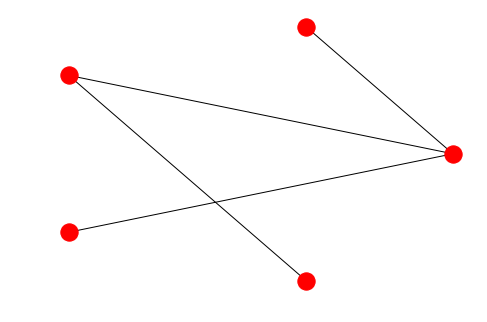

In [8]:
nx.draw_circular(graph)

<네트워크 기본 속성 분석>

1.네트워크 크기: -네트워크를 구성하는 노드들의수

네트워크 크기가 증가할수록 네트워크 구조의 복잡성도 증가
               
연결관계의 수:
               
방향성이 있는 경우:nx(n-1)
                
방향성이 없는 경우:nx(n-1)/2
           

2.네트워크 밀도: 네트워크를 구성하고 있는 노드들간의 연결된 정도

네트워크 밀도 계산

무방향 이진 네트워크의 밀도: k/{n*(n-1)/2}

방향 이진 네트워크의 밀도: k/{n*(n-1)}

k: 실제 연결된 링크의 수, n: 노드의 수
                

3.포괄성: 전체 네트워크의 밀집도를 연결된 노드의 관점에서 표현

네트워크 상의 총 노드의 개수 중에서 실제로 연결 관계가 존재하는 노드의 개수가 차지하는 비율
         

In [21]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from("1234")# 노드 추가하기
G.add_edges_from([(1,2),(1,3),(1,4)]) # 그래프 G에 하나의 엣지 추가
print(G[1]) #노드 1과 연결되는 노드들 {}안은 속성값

{2: {}, 3: {}, 4: {}}
print(G[2])

{1: {}}
print(G[3])

{1: {}}
print(G[1][2]) #엣지(1,2)의 속성값만 보여줌


{2: {}, 3: {}, 4: {}}
{1: {}}
{1: {}}
{}


In [22]:
G.add_edge(2,3)
G[2][3]['color']='blue'
print(G[2][3])


{'color': 'blue'}


In [23]:
fg = nx.Graph()
fg.add_weighted_edges_from([(1,2,0.125),(1,3,0.75),(2,4,1.2),(3,4,0.375)])
for (s,o,d) in fg.edges(data='weight'):
    if d<0.5: print('(%d, %d, %.3f)'%(s,o,d))

(1, 2, 0.125)
(3, 4, 0.375)


In [24]:
g = nx.Graph(day="friday")

In [25]:
g.add_node(1, time='5pm')
g.add_nodes_from([1], time='5pm')
g.node[1]['time']='5pm'

In [26]:
G.number_of_edges() #4개의 엣지로 구성

4

In [27]:
G.number_of_nodes() #8개의 노드로 구성

8

### 네트워크에 내재된 속성 분석
상호성: 방향 네트워크 상에서 2개의 노드 간의 연결이 서로 쌍방향인 경우: 상호적 연결, 단방향인 경우 비상호적 연결

*상호성 계산:

노드쌍 기준 상호성: 상호적으로 연결된 노드 쌍/연결된 전체 노드 쌍

연결 링크 기준 상호성: 상호적으로 연결된 링크 수/ 연결된 전체 링크 수
   
*군집화 계수

군집화: 네트워크 상에서 특정 부분의 노드들이 밀접하게 연결되어 다른 부분보다 네트워크 밀도가 높아지는 현상

지역 군집화 계수 계산: 이웃 노드들간에 실제 존재하는 링크 수(N)/이웃 노드들 간에 가능한 최대 링크 수(k*(k-1)/2)
 

# 소셜 네트워크 분석 지표
중심성 분석

중심성 지표: 소셜 네트워크 분석 지표 중에서 일반적으로 가장 많이 사용되는 지표/한 행위자가 전체 네트워크에서 중심에 위치하는 정도로 표현하는 지표

연결정도 중심성: 네트워크 상에서 한 노드가 얼마나 많은 연결 관계를 가지고 있는지 측정하는 지표

근접 중심성: 해당 노드가 전체 네트워크 상에서 얼마나 중앙에 위치하고 있는지를 측정

매개 중심성: 네트워크 상에서 특정 노드가 다른 노드들의 중간에서 얼마나 중개자 및 매개자 역할을 하고 있는지를 측정

아이겐 벡터 중심성: 해당 노드에 직접 연결된 다른 노드들의 개수 뿐만 아니라 연결된 다른 노드들의 중요도 또한 함께 반영한 것
              


In [35]:
import networkx as nx
import matplotlib.pyplot as plt

In [39]:
def return_centralities_as_dict(input_g):
    # weighted degree centrality를 딕셔너리로 리턴
    def return_weighted_degree_centrality(input_g, normalized=False): #연결정도 중심성 함수
        w_d_centrality = {n:0.0 for n in input_g.nodes()}
        for u, v, d in input_g.edges(data=True):
            w_d_centrality[u]+=d['weight']
            w_d_centrality[v]+=d['weight']
        if normalized==True:
            weighted_sum = sum(w_d_centrality.values())
            return {k:v/weighted_sum for k, v in w_d_centrality.items()}
        else:
            return w_d_centrality
    def return_closeness_centrality(input_g): #근접 중심성 함수
        new_g_with_distance = input_g.copy()
        for u,v,d in new_g_with_distance.edges(data=True):
            if 'distance' not in d:
                d['distance'] = 1.0/d['weight']
        return nx.closeness_centrality(new_g_with_distance, distance='distance')
    def return_betweenness_centrality(input_g): #매개 중심성 함수
        return nx.betweenness_centrality(input_g, weight='weight')
    def return_pagerank(input_g): #아이겐벡터 중심성 함수
        return nx.pagerank(input_g, weight='weight')
    return {
        'weighted_deg':return_weighted_degree_centrality(input_g),
        'closeness_cent':return_closeness_centrality(input_g), 
        'betweeness_cent':return_betweenness_centrality(input_g),
        'pagerank':return_pagerank(input_g)
    }

weighted_deg: {'a': 120.0, 'b': 11.0, 'c': 101.0, 'd': 10.0}
closeness_cent: {'a': 14.285714285714285, 'b': 7.317073170731707, 'c': 13.043478260869566, 'd': 7.317073170731707}
betweeness_cent: {'a': 0.6666666666666666, 'b': 0.6666666666666666, 'c': 0.0, 'd': 0.0}
pagerank: {'a': 0.4748970800683251, 'b': 0.07433357154696582, 'c': 0.3796306755336949, 'd': 0.0711386728510143}


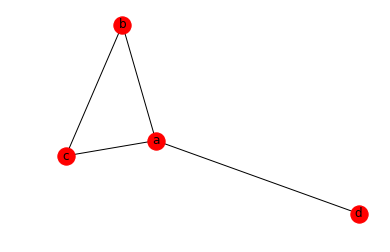

In [40]:
G = nx.Graph()
G.add_weighted_edges_from(
    [
        ('a', 'b', 10.0), ('b', 'c', 1.0), ('a', 'c', 100.0), ('a', 'd', 10.0)
    ]
)
nx.draw_networkx(G)
plt.axis('off')
for k, v in return_centralities_as_dict(G).items():
    print("{}: {}".format(k, v))

# 소셜 네트워크 분석 도구
NodeXL

UCINET

Pajek

NetMiner

Gephi

이러한 도구들을 이용하여 각 네트워크 분석과 시각화 기능을 구현할 수 있다.